In [ ]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [20]:
list_path=os.listdir(r"bbk")
list_path=["bbk/"+i for i in list_path]
list_path

['bbk/.DS_Store',
 'bbk/16273.jpg',
 'bbk/16274.jpg',
 'bbk/LINE_ALBUM_slip_230227_106.jpg',
 'bbk/LINE_ALBUM_slip_230227_163.jpg',
 'bbk/LINE_ALBUM_slip_230227_169.jpg',
 'bbk/LINE_ALBUM_slip_230227_170.jpg',
 'bbk/LINE_ALBUM_slip_230227_171.jpg',
 'bbk/LINE_ALBUM_slip_230227_172.jpg',
 'bbk/LINE_ALBUM_slip_230227_178.jpg',
 'bbk/LINE_ALBUM_slip_230227_179.jpg',
 'bbk/LINE_ALBUM_slip_230227_17_0.jpg',
 'bbk/LINE_ALBUM_slip_230227_185.jpg',
 'bbk/LINE_ALBUM_slip_230227_193.jpg',
 'bbk/LINE_ALBUM_slip_230227_195.jpg',
 'bbk/LINE_ALBUM_slip_230227_196.jpg',
 'bbk/LINE_ALBUM_slip_230227_197.jpg',
 'bbk/LINE_ALBUM_slip_230227_198.jpg',
 'bbk/LINE_ALBUM_slip_230227_201.jpg',
 'bbk/LINE_ALBUM_slip_230227_202.jpg',
 'bbk/LINE_ALBUM_slip_230227_204.jpg',
 'bbk/LINE_ALBUM_slip_230227_205.jpg',
 'bbk/LINE_ALBUM_slip_230227_207.jpg',
 'bbk/LINE_ALBUM_slip_230227_208.jpg',
 'bbk/LINE_ALBUM_slip_230227_210.jpg',
 'bbk/LINE_ALBUM_slip_230227_212.jpg',
 'bbk/LINE_ALBUM_slip_230227_213.jpg',
 'bbk/LIN

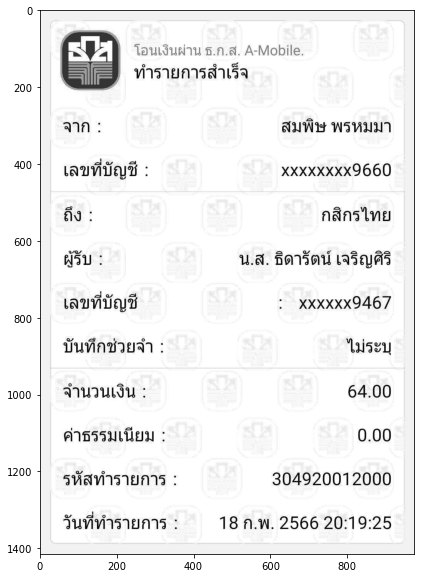

In [7]:
img=cv2.imread(list_path[0],0)
#_,img=cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(img,"gray")

In [4]:
reader=easyocr.Reader(['th','en'])

ls = reader.readtext(img,detail=0,paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['โอนเงินผ่าน ธ.ก.ส. a mobile.',
 'ทำรายการสำเร็จ',
 ' จาก',
 '.',
 'สมพิษ พรหมมา',
 'เลขที่บัญชี',
 ' xxxxxxxx9660',
 'ถึง',
 '.',
 'กสิกรไทย',
 'ผู้รับ :',
 'น.ส. ธิดารัตน์ เจริญศิริ',
 'เลขที่บัญชี',
 ' xxxxxx9467',
 'บันทึกช่วยจำ',
 'จำนวนเงิน',
 '64.00',
 'ค่าธรรมเนียม',
 'o.00',
 'รหัสทำรายการ',
 '304920012000',
 'วันทีทำรายการ',
 '18 ก.พ. 2566 20:19:25',
 ' ไม่ระบุ']

In [8]:
from tqdm import tqdm
import easyocr
check_list = []
img_list = []
reader=easyocr.Reader(['th','en'])
for i in tqdm(range(0,10)):
    img = cv2.imread(list_path[i],0)
    ls = reader.readtext(img,detail=0,paragraph=False)
    if 'a mob' in ls[0] or 'a-mob' in ls[0]:
        check_list.append("1")
    else:
        check_list.append("0")
    img_list.append(ls)
,'krungsri','krungthai','memo','scb','ttb'

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 10/10 [02:30<00:00, 15.07s/it]


In [40]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank']

for bank in Bank_list:
    list_path = os.listdir(bank)
    list_path = [os.path.join(bank, j) for j in list_path]
    check_list_ = {}
    img_list_ = {}
    check_list_[bank] = []
    img_list_[bank] = []

    reader = easyocr.Reader(['th','en'])

    for k in tqdm(range(0,2)):
        img = cv2.imread(list_path[k], 0)
        if img is not None:  # check if image was loaded correctly
            ls = reader.readtext(img, detail=0, paragraph=False)

            if 'a mob' in ls[0] or 'a-mob' in ls[0]: #Logical for Bank slip
                check_list_[bank].append("1")
            else:
                check_list_[bank].append("0")
            img_list_[bank].append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")

    print(f'check_list_{bank}' , check_list_[bank])


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 2/2 [00:35<00:00, 17.83s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['1', '1']


  0%|          | 0/2 [00:00<?, ?it/s]

In [34]:
check_list_bbk

NameError: name 'check_list_bbk' is not defined